### Instructor Demo: Diversification

This program reads in the CSV datasets of several stocks and calculates a correlation table and heatmap to determine the semiconductor stock that is least correlated to `JNJ` and `HD`.

In [21]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

### Read CSV in as DataFrame

In [22]:
# Set file paths
hd_data = Path("../Resources/HD.csv")
jnj_data = Path("../Resources/JNJ.csv")
intc_data = Path("../Resources/INTC.csv")
amd_data = Path("../Resources/AMD.csv")
mu_data = Path("../Resources/MU.csv")
nvda_data = Path("../Resources/NVDA.csv")
tsm_data = Path("../Resources/TSM.csv")

# Read the individual CSV datasets
hd = pd.read_csv(hd_data, index_col="date",parse_dates=True)
jnj = pd.read_csv(jnj_data, index_col="date",parse_dates=True)
intc = pd.read_csv(intc_data, index_col="date",parse_dates=True)
amd = pd.read_csv(amd_data, index_col="date",parse_dates=True)
mu = pd.read_csv(mu_data, index_col="date",parse_dates=True)
nvda = pd.read_csv(nvda_data, index_col="date",parse_dates=True)
tsm = pd.read_csv(tsm_data, index_col="date",parse_dates=True)

intc.head()

,INTC
date,
2019-05-14,45.17
2019-05-13,44.76
2019-05-10,46.20
2019-05-09,46.62
2019-05-08,49.24


### Combine the DataFrames

In [23]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)
combined_df = pd.concat([jnj,hd,intc,amd,mu,nvda,tsm],axis="columns",join="outer")
combined_df.head()

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
2019-05-14,66.97,191.62,45.17,27.32,38.51,162.04,41.97
2019-05-13,66.49,190.34,44.76,26.24,37.38,158.45,40.99
2019-05-10,67.22,194.58,46.20,27.96,38.94,168.82,42.83
2019-05-09,66.04,194.58,46.62,27.21,39.27,170.19,43.25
2019-05-08,66.02,195.17,49.24,27.09,39.75,173.92,43.70


### Sort the DataFrame

In [24]:
# sort the dataframe in ascending order to ensure correct pct_change calculation
combined_df.sort_index(inplace=True)
combined_df.head()

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
2009-05-14,11.9665,24.53,15.54,4.24,4.55,8.52,10.2488
2009-05-15,11.7316,24.40,15.19,4.01,4.24,8.74,9.9701
2009-05-18,12.1925,26.02,15.52,4.14,4.68,9.27,10.4975
2009-05-19,12.3875,24.63,15.65,4.39,4.85,9.45,10.5871
2009-05-20,12.3299,23.83,15.58,4.50,4.80,9.73,10.4677


### Calculate Daily Returns

In [25]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_returns_df = combined_df.pct_change()
daily_returns_df.head()

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
2009-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-15,-0.019630,-0.005300,-0.022523,-0.054245,-0.068132,0.025822,-0.027193
2009-05-18,0.039287,0.066393,0.021725,0.032419,0.103774,0.060641,0.052898
2009-05-19,0.015993,-0.053420,0.008376,0.060386,0.036325,0.019417,0.008535
2009-05-20,-0.004650,-0.032481,-0.004473,0.025057,-0.010309,0.029630,-0.011278


### Calculate Correlation

In [26]:
# Use the `corr` function to calculate correlations for each stock pair
corr_df = daily_returns_df.corr()
corr_df.head()

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
JNJ,1.000000,0.323230,0.314773,0.249163,0.332017,0.250416,0.315675
HD,0.323230,1.000000,0.427548,0.287933,0.373678,0.353555,0.392001
INTC,0.314773,0.427548,1.000000,0.373009,0.505711,0.474207,0.498963
AMD,0.249163,0.287933,0.373009,1.000000,0.427190,0.450167,0.343626
MU,0.332017,0.373678,0.505711,0.427190,1.000000,0.506650,0.473379


### Plot Correlation

<Axes: >

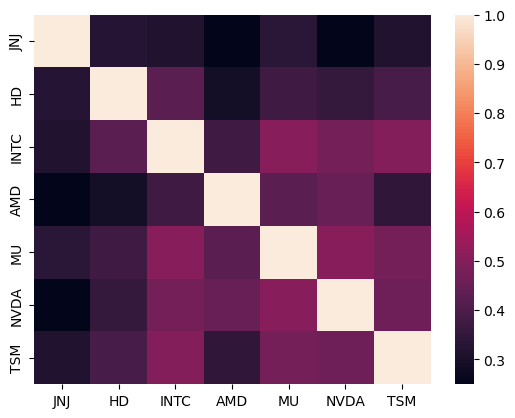

In [27]:
# Create a heatmap from the correlation values
sns.heatmap(corr_df)

<Axes: >

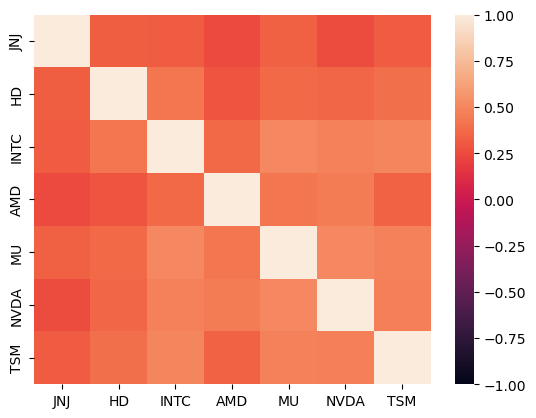

In [28]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(corr_df, vmin=-1, vmax=1, )

### Which semiconductor stock would be the best candidate to add to the existing portfolio?

*AMD (for HD) and NVDA (for JNJ)*